# Intro to Linear Regression
## BogaziciAI

Linear regression is the process of modelling a linear relationship between variables.

In order to understand it clearly, we can define a custom dataset, that includes a linear relationship between 2 variables.
Let's assume that our dataset is linearly correlated as Y=AX+B ideally.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

First create a dataset that has disturbances.

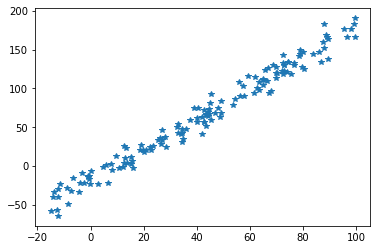

In [3]:
A = 2
B = -20
x_range = [-20, 100]

def load_dataset(n=150):
  x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
  eps = np.random.normal(0,10,n)
  y = A * x  + B + eps
  return np.array(y).reshape(-1,1), np.array(x).reshape(-1,1)

y, x = load_dataset()

plt.plot(x,y,'*')
plt.show()


As data seem to be correlated linearly, (We already know that in this situation as it is created by us, but we need to inspect unkown datasets in order to choose an eligable method.) it is appropriate to apply linear regression.

A: 1.97		B: -17.90	R2: 0.976


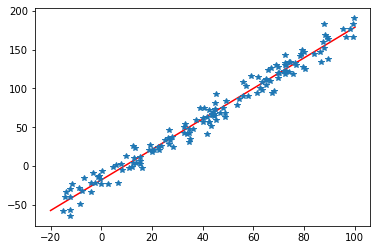

In [4]:
regression = linear_model.LinearRegression()
regression = regression.fit(x,y)
print(f"A: {regression.coef_[0][0]:.2f}\t\tB: {regression.intercept_[0]:.2f}\tR2: {regression.score(x,y):.3f}")

x_pred = np.array(x_range).reshape(-1,1)
y_pred = regression.predict(x_pred)
plt.plot(x_pred,y_pred,'r-',x,y,'*')
plt.show()

# <font color='green'>Load CVS file with PANDAS</font> 

In this section, you are given weather data. You will use pandas dataframe to load csv file. Observe dataframe shape and by using .head(), investigate the content of the data.

In [5]:
import pandas as pd
WeatherData=pd.read_csv('weatherHistory.csv')  
WeatherData.shape

(1999, 12)

In [6]:
WeatherData.head()

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Loud Cover,Pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [7]:
WeatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Formatted Date        1999 non-null   object 
 1   Summary               1999 non-null   object 
 2   Precip Type           1999 non-null   object 
 3   Temperature           1999 non-null   float64
 4   Apparent Temperature  1999 non-null   float64
 5   Humidity              1999 non-null   float64
 6   Wind Speed            1999 non-null   float64
 7   Wind Bearing          1999 non-null   int64  
 8   Visibility            1999 non-null   float64
 9   Loud Cover            1999 non-null   int64  
 10  Pressure              1999 non-null   float64
 11  Daily Summary         1999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 187.5+ KB


In [12]:
Temp=WeatherData.Temperature
Hum=WeatherData.Humidity
WindSpeed=WeatherData['Wind Speed']
type(Temp)
type(Hum)

pandas.core.series.Series

Data visualization is cruicial to understand the quality of the data. You need to observe inputs and outputs to form a hypothesis about possible correlations. Investigate matplotlib. 

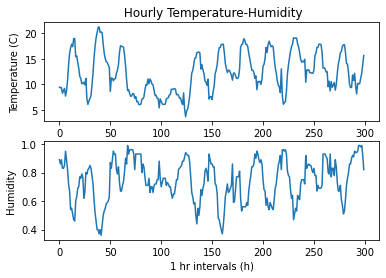

In [13]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1) # two rows, one column, first plot
ax1.set_ylabel('Temperature (C)')
ax1.set_xlabel('1 hr intervals (h)')
ax1.set_title(' Hourly Temperature-Humidity')
ax1.plot(Temp[0:300])

ax2 = fig.add_subplot(2, 1, 2) # two rows, one column, first plot
ax2.set_ylabel('Humidity ')
ax2.set_xlabel('1 hr intervals (h)')
ax2.plot(Hum[0:300])


Lets scatterplot the same data to see different kinds of visualizations. 

Text(0, 0.5, 'Humidity (%)')

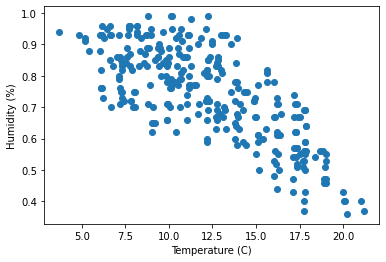

In [14]:
fig = plt.figure()
plt.scatter(Temp[0:300],Hum[0:300])
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity (%)')


<font color='red'> Optional Exercise : </font> Use .scatter(Temp[0:300], WindSpeed[0:300], Hum[0:300]) to make a 3d plot including windspeed for the first 300 data points.  

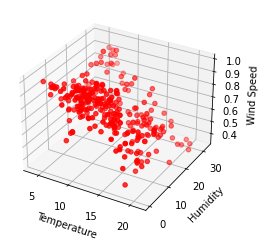

In [15]:
#ax = plt.figure().add_subplot(projection='3d')
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =Temp[0:300]
y =WindSpeed[0:300]
z =Hum[0:300]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Wind Speed')

plt.show()
#ax.

#ax.set_zlim(0, 1)

#ax.set_xlabel('Temperature (C)')
#ax.set_ylabel('Wind Speed')
#ax.set_zlabel('Humidity')

#  <font color='green'>Real Estate Data, Linear and Nonlinear Regression</font> 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
#################  Dosya ismi Realestate.csv, panda dataframe olarak yukleyin
HouseData= pd.read_csv('Realestate.csv')  
#################
HouseData.shape

(428, 8)

In [17]:
HouseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    428 non-null    int64  
 1   transactiondate       428 non-null    float64
 2   houseage              428 non-null    float64
 3   distancetostation     428 non-null    float64
 4   numberofstores        428 non-null    int64  
 5   latitude              428 non-null    float64
 6   longitude             428 non-null    float64
 7   housepriceofunitarea  428 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.9 KB


In [18]:
HouseData.head()

,No,transactiondate,houseage,distancetostation,numberofstores,latitude,longitude,housepriceofunitarea
0,0,2012.1,15.0,88.0,3,1.0,2.0,195.4
1,0,2012.1,12.0,300.0,3,1.0,2.0,85.7
2,0,2012.1,14.0,658.0,5,1.0,2.0,44.9
3,0,2012.1,20.0,204.0,7,1.0,2.0,135.6
4,0,2012.1,22.0,1020.0,6,1.0,2.0,33.5


#  <font color='green'>Linear Regression</font>

<font color='red'>Example: run the code in 3 sections in order for ToNthHouse=10 and ToNthHouse=14 and answer 3 questions below </font>

(0.0, 220.0)

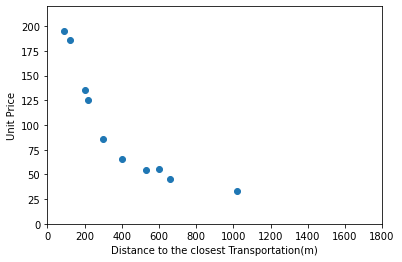

In [19]:
import pandas as pd

Dist=HouseData['distancetostation'].to_numpy()
Price=HouseData['housepriceofunitarea'].to_numpy()
Age=HouseData['houseage'].to_numpy()

######  First Examine House Distance vs Price for the first 10 house values(ToNthHouse) then 14

ToNthHouse=10

######
fig = plt.figure()
plt.scatter(Dist[:ToNthHouse],Price[:ToNthHouse])
plt.xlabel('Distance to the closest Transportation(m)')
plt.ylabel('Unit Price')
plt.xlim(0,1800)
plt.ylim(0,220)

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(Dist[:ToNthHouse].reshape(-1, 1), Price[:ToNthHouse].reshape(-1, 1))
reg.score(Dist[:ToNthHouse].reshape(-1, 1), Price[:ToNthHouse].reshape(-1, 1))

0.752143701166438

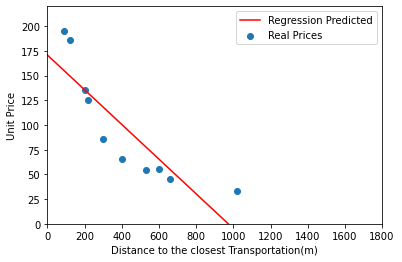

In [21]:
import numpy as np
PredictedPrice=reg.predict(np.arange(0,1800,100).reshape(-1,1))

fig = plt.figure()
plt.scatter(Dist[:ToNthHouse],Price[:ToNthHouse])
plt.xlabel('Distance to the closest Transportation(m)')
plt.ylabel('Unit Price')
plt.xlim(0,1800)
plt.ylim(0,220)
plt.plot(np.arange(0,1800,100),PredictedPrice,'r')
plt.legend(['Regression Predicted','Real Prices'])

<font color='red'>QUESTIONS:</font>

1) What is the regression score (reg.score, out[177]) for ToNthHouse= 10 and 14. Write your answers below.


2) Outliers in regression are observations that fall far from the “cloud” of points. These points might be especially important. Which ones would be the outlier in ToNthHouse=10 and ToNthHouse=14 cases? 



3) Why do you think that regression score differs so much when 4 additional data points are added?
Hint: print Panda dataframe information for indices 0-14 (HouseData[0:14]) . 
Do you think that linear regression Y=aX+B is useful in this case?


0.752 and 0.116          
 data(4) for ToNth=10 and data(4,10,11,12,13) for ToNth=14     
for ToNth=10 linear reg fits to data set but for ToNth=14 we might need higher degree polynomial approach 

#  <font color='green'>Nonlinear  Nth Degree poly.  Regression, Y=aX^(n)+bX^(n-1)...+gX^1+h</font>

#### <font color='red'>Example: Command  N_poly_degree, change the polynomial nonlinear regression degree and observe how the scores of the predictions change </font>  


In [22]:
from sklearn.preprocessing import PolynomialFeatures
ToNthHouse=14
N_poly_degree=2
####
#N_poly_degree=2
####
poly = PolynomialFeatures(N_poly_degree)
Dist_transformed=poly.fit_transform(Dist[:ToNthHouse].reshape(-1,1))

model = LinearRegression()

model.fit(Dist_transformed,Price[:ToNthHouse].reshape(-1, 1) )
model.score(Dist_transformed,Price[:ToNthHouse].reshape(-1, 1))

0.9358567701993217

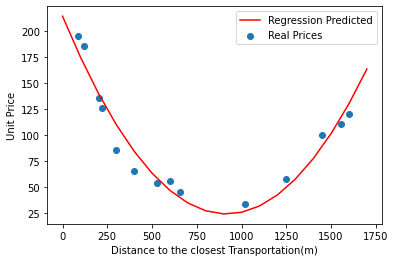

In [23]:
Dist_Prediction_transformed=poly.fit_transform(np.arange(0,1800,100).reshape(-1,1))
PredictedPrice=model.predict(Dist_Prediction_transformed)

fig = plt.figure()
plt.scatter(Dist[:ToNthHouse],Price[:ToNthHouse])
plt.xlabel('Distance to the closest Transportation(m)')
plt.ylabel('Unit Price')

plt.plot(np.arange(0,1800,100),PredictedPrice,'r')
plt.legend(['Regression Predicted','Real Prices'])

<font color='red'>Question:</font> When we switched to nonlinear regression, the prediction became better for the 14 data points, Do you think that we adopted a correct approach, is the only variable that determines the House Unit Price their distance to the closest transportation or are there any other variables that could have an influence on the House Unit Price? Write your answer here.
2. degree polynomial regression fits for data which includes only distance information but probably there are other variables affects house price noticeable

# <font color='red'>THE FINAL EXERCISE: </font>  
When you look at the dataframe called HouseData, data that have "No=0" are fabricated by us to get you familiar with the libraries and their functions to produce simple linear and nonlinear regression models. Now, You can continue with the real data from the city Pompeii. Drop the first 14 fabricated rows from the data frame. 



In [24]:
HouseData=HouseData.drop(np.arange(0,14))
HouseData.head()

,No,transactiondate,houseage,distancetostation,numberofstores,latitude,longitude,housepriceofunitarea
14,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
15,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
16,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
17,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
18,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1



This is <font color='red'>the final task.</font> You are expected to create a similar linear or nonlinear regression analysis on the real data. <font color='green'>You can choose how complicated you would like to have your investigation. Any analysis will be enough for you to fullfil this task, you do not have to present a very good correlation.</font> After you are done, Please email us this .ipynb file updated by you, then we will welcome you to Summer Machine Learning + Deep Learning study group powered by Bogazici Uni. student and Alumni volunteers. 


Some ideas you can work on:

1) The simplest analysis would be to show the linear or nonlinear relation between the HouseAge and Unit Price.

2) If you like a more challenging analysis to exercise your coding skills, You can use two or more variables such as HouseAge and Distancetostation to run a linear and nonlinear regression to predict house price of unit area.

3) If you like a deeper analysis, you can investigate the correlation between House Unit Price distance to station when HouseAge<10 and numberofstores<3. You can also learn about correlation matrix, Download seaborn library and run the below code. According the correlation information you are getting from the heatmap, create your regression analysis. 



# <font color='green'>Extra Material for option 3 </font>

Correlation Matrix: It measures the relationship between two variables. The measure is best used in variables that demonstrate a linear relationship between each other. 

-1 indicates a perfectly negative linear correlation between two variables

0 indicates no linear correlation between two variables

1 indicates a perfectly positive linear correlation between two variables

<font color='green'>Code For Option 3 </font> 

<AxesSubplot:>

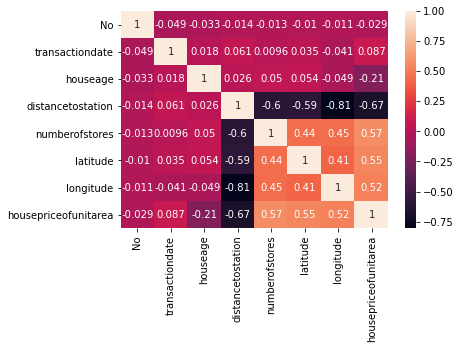

In [25]:
import  seaborn as sns

sns.heatmap(HouseData.corr(),annot=True)

In [26]:
## Start your Code from there and create as many as cell you need to make your code easy to follow ##
from sklearn.model_selection import train_test_split 
poly_d = PolynomialFeatures(3)
poly_a = PolynomialFeatures(1)
Dist_transformed_2=poly_d.fit_transform(Dist.reshape(-1,1))
Age_transformed_2=poly_a.fit_transform(Age.reshape(-1,1))
merged = np.concatenate((Dist_transformed_2,Age_transformed_2), axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(merged, Price, test_size=0.1)


reg_2 = LinearRegression()
reg_2.fit(X_train, Y_train)
reg_2.score(X_test,Y_test)

0.7621067300173152

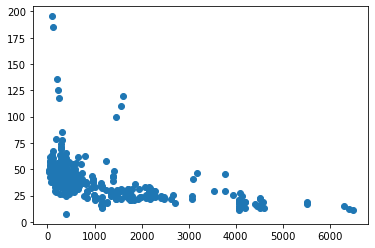

In [27]:
plt.scatter(Dist,Price)

In [ ]:
plt.scatter(Age,Price)

# <font color='red'>Feedback</font>

We appreciate feedbacks from you to make the exercise better for future generations. 

1) What do you find most useful in this document?

2) Is there any part that was not clear to you?

3) How do you rank your coding and regression skills before the task and how difficult was to follow this document?

4) Any other suggestions to make it more fun?
